In the intial stages i have shown creation of function(global_fun) step wise at the end a combine function is created which requires you the path of folders and images

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.15.0


In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vgg19:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F6303%2F9897%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240619%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240619T060548Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D85a975cd52754aca6e31c914ad1f090c74bfc73ad9d800661cd1efbda4a55ec64241f764eb50865f0bc5a3919687e90a58a3733fd0daa2c85d1aeca8948a496f346947806416722c536423fbe723c27abd9f771465a1e8eec75d157d0fb71c089cd1fe5fba85866292699a52964b32086d36444974f1a22dd09685024ab20dd50dbbd0f6cc4ec36eb231a49433b1bfecf74f381326ae5ae6d146d8c191d658b3d2f9dda3e27ee3b0631b690d9b20c6b1ee8827be71348ee988f15972057cb5cfc03b9eb070bd01b17670251e3b704240cdba1b47302f35ee28dc0f918d36f90cb03a7fae86700188b32ec8d27c46a788d1658390ca907b85d0b57c3e1caf9040,image-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F55098%2F107188%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240619%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240619T060548Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3629c03809169ab8c983d512cacaf6df120da7264656e6d9396f6dfb417c256264be94af5ec71805c3beb1d3ee64678734409164006d5c50fe1d57eb0ce43b7bdda711ef84cea94620215db30aec071dfd784f620b925fc0b7bedad87d091c54a2eeb584ac7851ef6f75d063f00288a87cb8de67e7243f4b34cb670d9d109ef6b0d75ba77fffe507a5e061959febca936cf6d85a2f47a727f4294cceb9cf00b119c477839cda6f01369fc6872d0ee459753cb06b7665a8c398fad5f0b8a250dc40f1efd4b24c10a69fcc90b7d5a7a2a76f0fd72464259e7e2c378bb408a33dccf2457c7a960966bc9af4f6dda4931d58e4237a612b9e233b7ee9d120cae30278,best-artworks-of-all-time:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F130081%2F310927%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240619%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240619T060548Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D32509c3069c6f3445312bdabfd39796922d0eece57d7cac5794308c27b522f397047e8de9710d639f5f15511a1394b729644fef411c0230c21e805f6489001694472c196790d011cc0701fdd940899465da3c858dca17d8e6c4c0f2cb564bc617a2403f560923dc8bbcad42e7d840b6a4b5d778c1225c4b2f98e577c8817a3deec877f0dab46626ceda59c6835f52258fecf1c1c15c6abff38f316b296c02a7b4aa1deacb9dd1557511f7b80ac5195b8d8651d3d0fd69a180bd965435f93fe83029ca617d4740fbbdad8fc26c5001686affc211a4e90d0e0e6b3ab63cae20860b7bcbe41642da65295a2d58f8af5fb1a8855f3b14cf898220693d6a18d2aec95'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 608000438 bytes downloaded
Downloaded and uncompressed: vgg19
[==================================================] 2514186873 bytes downloaded
Downloaded and uncompressed: image-classification
[==================================================] 2460161668 bytes downloaded
Downloaded and uncompressed: best-artworks-of-all-time
Data source import complete.


In [3]:
import pandas as pd
import numpy as np
import os
from keras import backend as K
from keras.preprocessing.image import load_img, save_img, img_to_array
import matplotlib.pyplot as plt
from keras.applications import vgg19
from keras.models import Model
#from keras import optimizers
from scipy.optimize import fmin_l_bfgs_b
#from keras.applications.vgg19 import VGG19
#vgg19_weights = '../input/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
#vgg19 = VGG19(include_top = False, weights=vgg19_weights)
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [4]:
StylePath = '../input/best-artworks-of-all-time/images/images/Diego_Velazquez/'
ContentPath = '../input/image-classification/validation/validation/art and culture/'

In [5]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [6]:
# This detect if cuda is available for GPU training otherwise it will use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [7]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

print(imsize)

# scale imported image
# transform it into a torch tensor
loader = transforms.Compose([transforms.Resize(imsize),  transforms.ToTensor()])

128


In [8]:
# Helper function
def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)
def image_loader(image_name, size=None):
    image = Image.open(image_name)
    if size is not None:
        image = transforms.Resize(size)(image)
    # Fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

# Define a transformation to match the size of the content image
def get_image_size(image):
    return image.shape[2], image.shape[3]
# Helper function to show the tensor as a PIL image
def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

In [9]:
content_image = image_loader(ContentPath+'9.jpg')
content_size = get_image_size(content_image)
style_image = image_loader(StylePath+'Diego_Velazquez_1.jpg',size = content_size)
print(style_image.size())
print(content_image.size())
assert style_image.size() == content_image.size(), "we need to import style and content images of the same size"


unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()


torch.Size([1, 3, 162, 128])
torch.Size([1, 3, 162, 128])


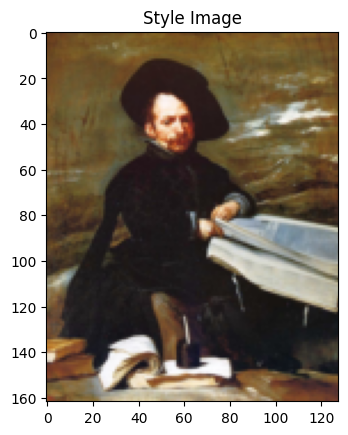

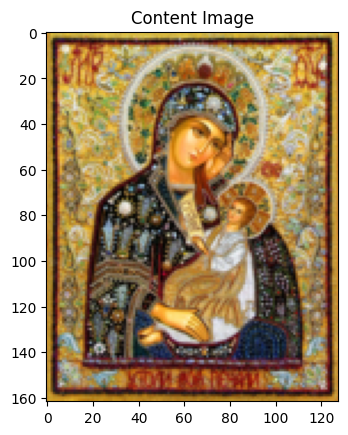

In [10]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy
plt.figure()
imshow(style_image, title='Style Image')

plt.figure()
imshow(content_image, title='Content Image')

In [11]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

# This is for the style loss
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

# Same structure as the content loss
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

In [12]:
# Importing the VGG 19 model like in the paper (here we set it to evaluation mode)
cnn = models.vgg19(pretrained=True).features.to(device).eval()

# VGG network are normalized with special values for the mean and std
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# create a module to normalize input image so we can easily put it in a nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize img
        return (img - self.mean) / self.std

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 65.8MB/s]


In [13]:
# Here we insert the loss layer at the right spot

# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [14]:
def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    cnn = copy.deepcopy(cnn)

    # normalization module
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # just in order to have an iterable access to or list of content/syle
    # losses
    content_losses = []
    style_losses = []

    # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ContentLoss
            # and StyleLoss we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

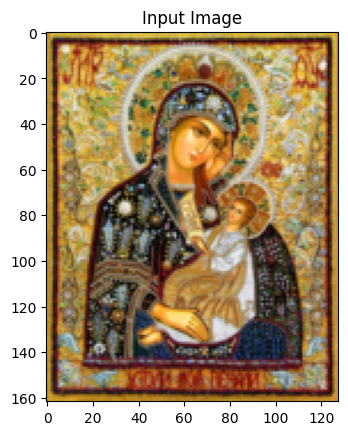

In [15]:
input_img = content_image.clone()
# add the original input image to the figure:
plt.figure()
imshow(input_img, title='Input Image')

In [16]:
# This type of optimizer was prefered by the author of the paper
def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.LBFGS([input_img.requires_grad_()])
    return optimizer

# This will run the neural style transfer
# It will create image that goes above 1 or below 0, however it will be normalized
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)
    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            input_img.data.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] >= 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # a last correction to have the tensors between 0 and 1
    input_img.data.clamp_(0, 1)

    return input_img

In [17]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_image, style_image, input_img, num_steps=200, style_weight = 1000000)


Building the style transfer model..


<ipython-input-12-281f95be68a5>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-12-281f95be68a5>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [1]:
Style Loss : 58756.890625 Content Loss: 0.000000

run [2]:
Style Loss : 58676.699219 Content Loss: 0.000005

run [3]:
Style Loss : 19119.052734 Content Loss: 6.723341

run [4]:
Style Loss : 10200.429688 Content Loss: 9.377708

run [5]:
Style Loss : 5290.588379 Content Loss: 13.067410

run [6]:
Style Loss : 2900.641113 Content Loss: 17.210415

run [7]:
Style Loss : 1912.612671 Content Loss: 20.904263

run [8]:
Style Loss : 1915.477417 Content Loss: 23.774452

run [9]:
Style Loss : 1404.969482 Content Loss: 24.184198

run [10]:
Style Loss : 1233.580811 Content Loss: 24.949701

run [11]:
Style Loss : 1131.895264 Content Loss: 25.494612

run [12]:
Style Loss : 989.240356 Content Loss: 26.990862

run [13]:
Style Loss : 842.062500 Content Loss: 27.572666

run [14]:
Style Loss : 747.435486 Content Loss: 27.989101

run [15]:
Style Loss : 652.110107 Content Loss: 29.013994

run [16]:
Style Loss : 549.985840 Content Loss: 28.906187

run [17]:
Style Loss : 526.439026 Content

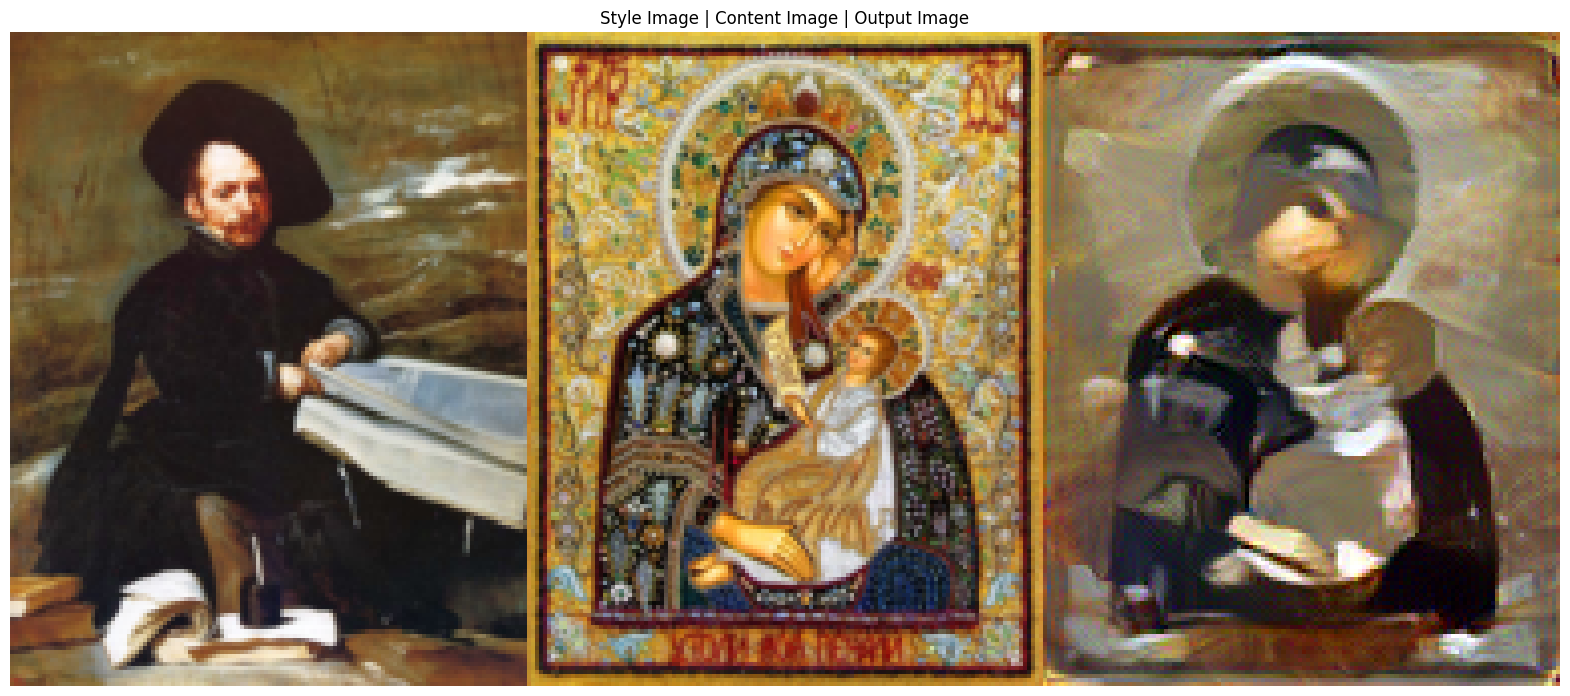

In [38]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Helper function to convert tensor to PIL Image
def tensor_to_pil(image_tensor):
    image = image_tensor.cpu().squeeze(0)  # Remove batch dimension and move to CPU
    image = transforms.ToPILImage()(image.clamp(0, 1))  # Clamp values and convert to PIL Image
    return image

# Convert content, style, and output images to PIL Images
content_pil = tensor_to_pil(content_image)
style_pil = tensor_to_pil(style_image)
output_pil = tensor_to_pil(output)

# Convert PIL Images to NumPy arrays
content_np = np.array(content_pil)
style_np = np.array(style_pil)
output_np = np.array(output_pil)

# Concatenate images horizontally
concatenated_image = np.concatenate((style_np, content_np, output_np), axis=1)

# Display concatenated image using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(concatenated_image)
plt.axis('off')  # Hide axes
plt.title('Style Image | Content Image | Output Image')
plt.show()


In [42]:
def global_fun(content_imagi,style_imagi):
    # desired size of the output image
  imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu
  loader = transforms.Compose([transforms.Resize(imsize),  transforms.ToTensor()])

  content_size = get_image_size(content_imagi)

  assert style_imagi.size() == content_imagi.size(), "we need to import style and content images of the same size"
  unloader = transforms.ToPILImage()  # reconvert into PIL image
  plt.ion()
  input_imgi = content_imagi.clone()
  output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_imagi, style_imagi, input_imgi, num_steps=200, style_weight = 1000000)
  def tensor_to_pil(image_tensor):
    image = image_tensor.cpu().squeeze(0)  # Remove batch dimension and move to CPU
    image = transforms.ToPILImage()(image.clamp(0, 1))  # Clamp values and convert to PIL Image
    return image

  # Convert content, style, and output images to PIL Images
  content_pil = tensor_to_pil(content_imagi)
  style_pil = tensor_to_pil(style_imagi)
  output_pil = tensor_to_pil(output)

  # Convert PIL Images to NumPy arrays
  content_np = np.array(content_pil)
  style_np = np.array(style_pil)
  output_np = np.array(output_pil)

  # Concatenate images horizontally
  concatenated_image = np.concatenate((style_np, content_np, output_np), axis=1)

  # Display concatenated image using matplotlib
  plt.figure(figsize=(20, 10))
  plt.imshow(concatenated_image)
  plt.axis('off')  # Hide axes
  plt.title('Style Image | Content Image | Output Image')
  plt.show()

Building the style transfer model..


<ipython-input-12-281f95be68a5>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-12-281f95be68a5>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [1]:
Style Loss : 12662.023438 Content Loss: 0.000000

run [2]:
Style Loss : 12637.560547 Content Loss: 0.000022

run [3]:
Style Loss : 7194.201660 Content Loss: 4.603050

run [4]:
Style Loss : 4855.227051 Content Loss: 7.765897

run [5]:
Style Loss : 3501.088135 Content Loss: 10.125071

run [6]:
Style Loss : 2572.528076 Content Loss: 12.640707

run [7]:
Style Loss : 1932.825073 Content Loss: 14.114331

run [8]:
Style Loss : 1514.032471 Content Loss: 14.838242

run [9]:
Style Loss : 1222.444458 Content Loss: 16.574699

run [10]:
Style Loss : 1047.788330 Content Loss: 17.224188

run [11]:
Style Loss : 878.818115 Content Loss: 18.580570

run [12]:
Style Loss : 734.288025 Content Loss: 19.874126

run [13]:
Style Loss : 640.778198 Content Loss: 20.561951

run [14]:
Style Loss : 600.872681 Content Loss: 20.896774

run [15]:
Style Loss : 572.907288 Content Loss: 20.322430

run [16]:
Style Loss : 519.753052 Content Loss: 21.077244

run [17]:
Style Loss : 474.867310 Content Lo

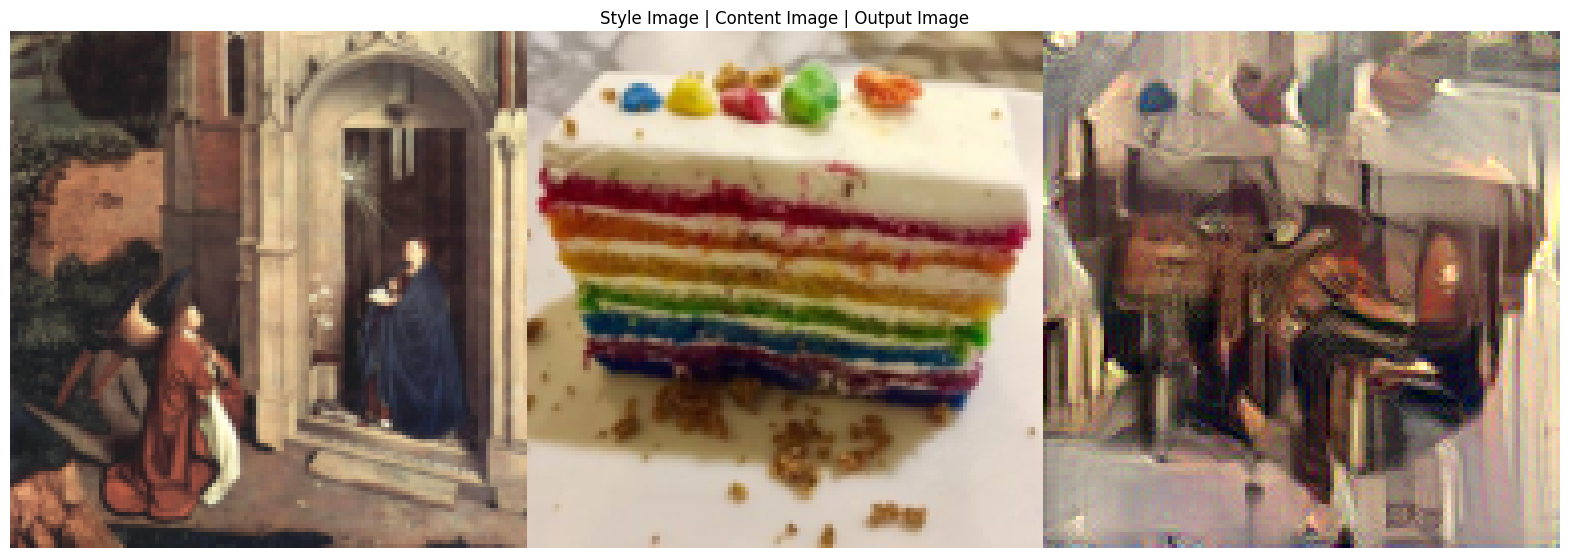

In [43]:
# StylePath = '../input/best-artworks-of-all-time/images/images/Diego_Velazquez/'
# ContentPath = '../input/image-classification/validation/validation/art and culture/'  demo
StylePath1 = '../input/best-artworks-of-all-time/images/images/Jan_van_Eyck/'
ContentPath1 = '../input/image-classification/validation/validation/food/'
content_imagi1 = image_loader(ContentPath1+'0Bc8QvgJwOInun6Ibxo4.jpeg')
content_size1 = get_image_size(content_imagi1)
style_imagi1 = image_loader(StylePath1+'Jan_van_Eyck_1.jpg',size = content_size1)
assert style_imagi1.size() == content_imagi1.size(), "we need to import style and content images of the same size"
unloader = transforms.ToPILImage()  # reconvert into PIL image
plt.ion()
global_fun(content_imagi1,style_imagi1)

Building the style transfer model..


<ipython-input-12-281f95be68a5>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-12-281f95be68a5>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [1]:
Style Loss : 2016.240234 Content Loss: 0.000000

run [2]:
Style Loss : 2009.952148 Content Loss: 0.000017

run [3]:
Style Loss : 1017.217529 Content Loss: 3.299537

run [4]:
Style Loss : 648.236450 Content Loss: 3.883722

run [5]:
Style Loss : 488.107300 Content Loss: 4.323761

run [6]:
Style Loss : 396.939880 Content Loss: 5.020056

run [7]:
Style Loss : 315.146423 Content Loss: 5.845279

run [8]:
Style Loss : 259.439178 Content Loss: 6.440870

run [9]:
Style Loss : 221.688675 Content Loss: 6.690813

run [10]:
Style Loss : 195.221664 Content Loss: 7.031661

run [11]:
Style Loss : 161.075516 Content Loss: 7.636499

run [12]:
Style Loss : 161.833389 Content Loss: 8.268880

run [13]:
Style Loss : 136.211533 Content Loss: 7.578201

run [14]:
Style Loss : 124.172585 Content Loss: 8.059740

run [15]:
Style Loss : 116.995010 Content Loss: 8.387332

run [16]:
Style Loss : 106.619102 Content Loss: 8.712614

run [17]:
Style Loss : 98.454788 Content Loss: 8.765609

run [18]

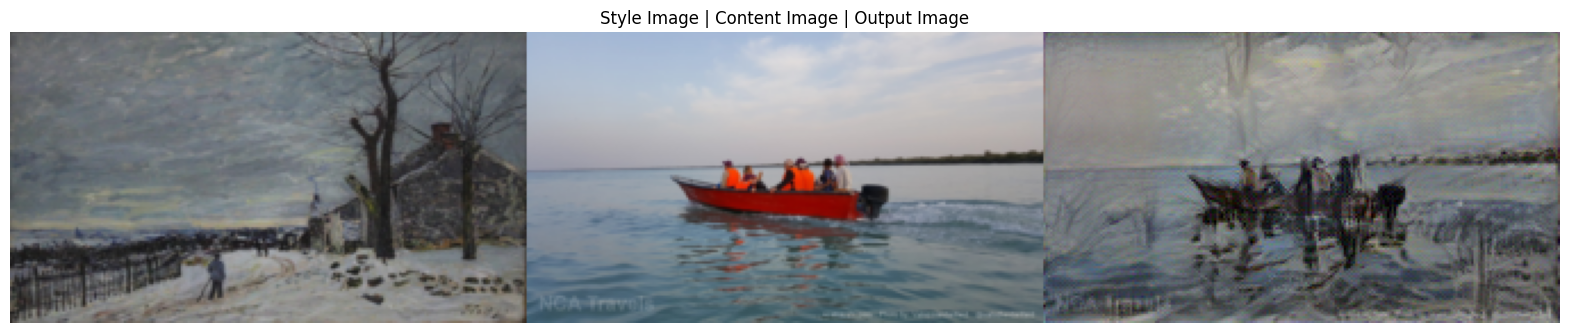

In [44]:
# eg 2
StylePath1 = '../input/best-artworks-of-all-time/images/images/Alfred_Sisley/'
ContentPath1 = '../input/image-classification/validation/validation/travel and adventure/'
content_imagi1 = image_loader(ContentPath1+'0.jpg')
content_size1 = get_image_size(content_imagi1)
style_imagi1 = image_loader(StylePath1+'Alfred_Sisley_1.jpg',size = content_size1)
assert style_imagi1.size() == content_imagi1.size(), "we need to import style and content images of the same size"
unloader = transforms.ToPILImage()  # reconvert into PIL image
plt.ion()
global_fun(content_imagi1,style_imagi1)

Building the style transfer model..


<ipython-input-12-281f95be68a5>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-12-281f95be68a5>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [1]:
Style Loss : 8494.162109 Content Loss: 0.000000

run [2]:
Style Loss : 8479.912109 Content Loss: 0.000016

run [3]:
Style Loss : 5362.035645 Content Loss: 5.659250

run [4]:
Style Loss : 4045.649902 Content Loss: 6.471860

run [5]:
Style Loss : 3478.010742 Content Loss: 7.281501

run [6]:
Style Loss : 2691.232178 Content Loss: 8.478016

run [7]:
Style Loss : 1774.489258 Content Loss: 12.852721

run [8]:
Style Loss : 1185.664429 Content Loss: 14.799566

run [9]:
Style Loss : 875.299561 Content Loss: 13.987594

run [10]:
Style Loss : 642.489441 Content Loss: 16.370703

run [11]:
Style Loss : 489.208862 Content Loss: 17.529593

run [12]:
Style Loss : 344.656708 Content Loss: 18.330732

run [13]:
Style Loss : 269.094482 Content Loss: 19.659277

run [14]:
Style Loss : 193.286880 Content Loss: 19.997667

run [15]:
Style Loss : 185.157639 Content Loss: 21.305885

run [16]:
Style Loss : 161.944489 Content Loss: 20.545198

run [17]:
Style Loss : 150.517014 Content Loss: 20

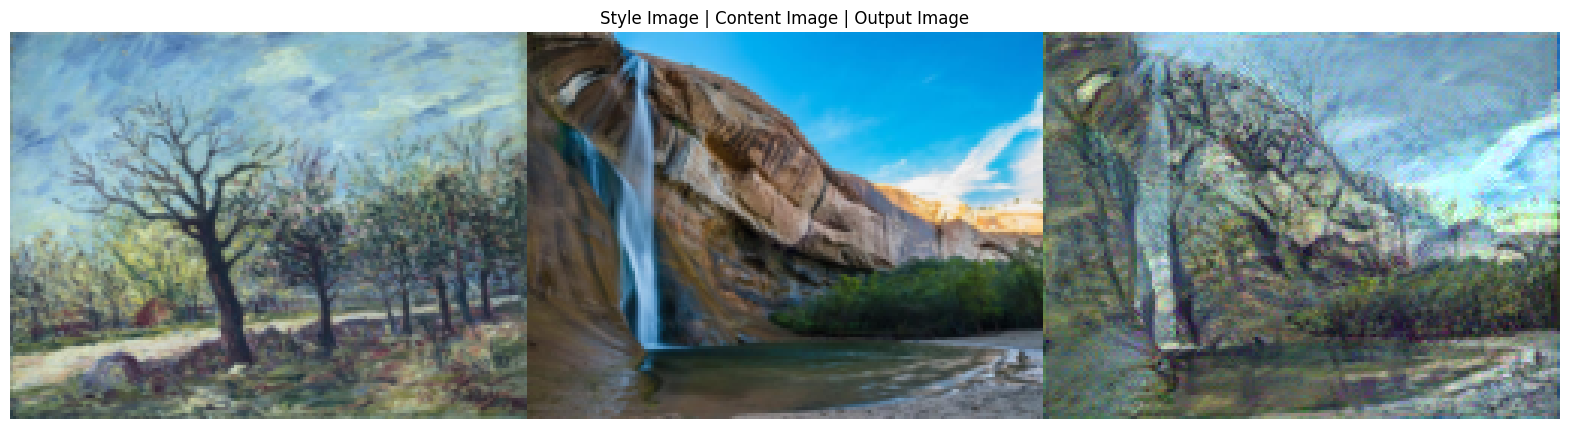

In [45]:
# eg 3
StylePath1 = '../input/best-artworks-of-all-time/images/images/Alfred_Sisley/'
ContentPath1 = '../input/image-classification/validation/validation/travel and adventure/'
content_imagi1 = image_loader(ContentPath1+'19.jpg')
content_size1 = get_image_size(content_imagi1)
style_imagi1 = image_loader(StylePath1+'Alfred_Sisley_125.jpg',size = content_size1)
global_fun(content_imagi1,style_imagi1)